In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
from PIL import Image
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from acquire import *
from prepare import *
from explore import *
from wrangle import *
import env
import os
pd.options.mode.chained_assignment = None

In [2]:
train, validate, test = wrangle_zillow()

Number of observations removed: 239823


        Unnamed: 0  bedroomcnt  bathroomcnt  cal_fin_sqf   tax_val  \
405043      405043         3.0          3.0       2268.0  123381.0   
279434      279434         3.0          2.5       2662.0  540847.0   
764686      764686         3.0          2.0       1143.0  414210.0   

        year_built  taxamount    fips  
405043      1976.0    1844.91  6037.0  
279434      2000.0    8145.70  6059.0  
764686      1973.0    4858.88  6111.0   

(1071302, 8)


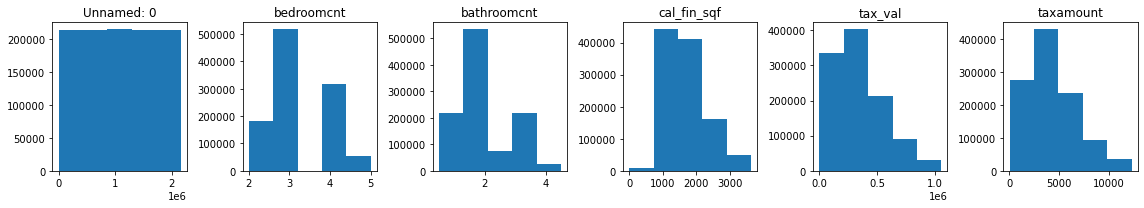

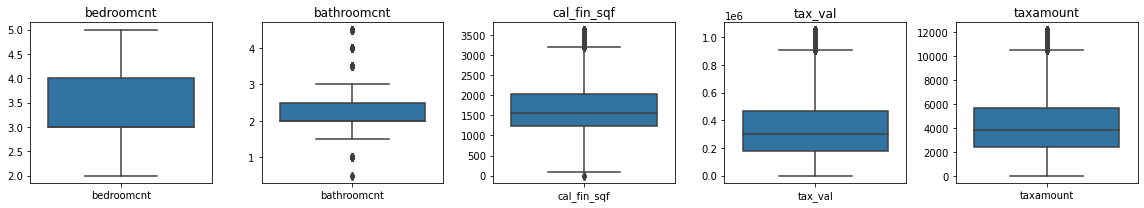

In [20]:
print(train.head(3), "\n")
print(train.shape)

get_box_hist_viz(train)

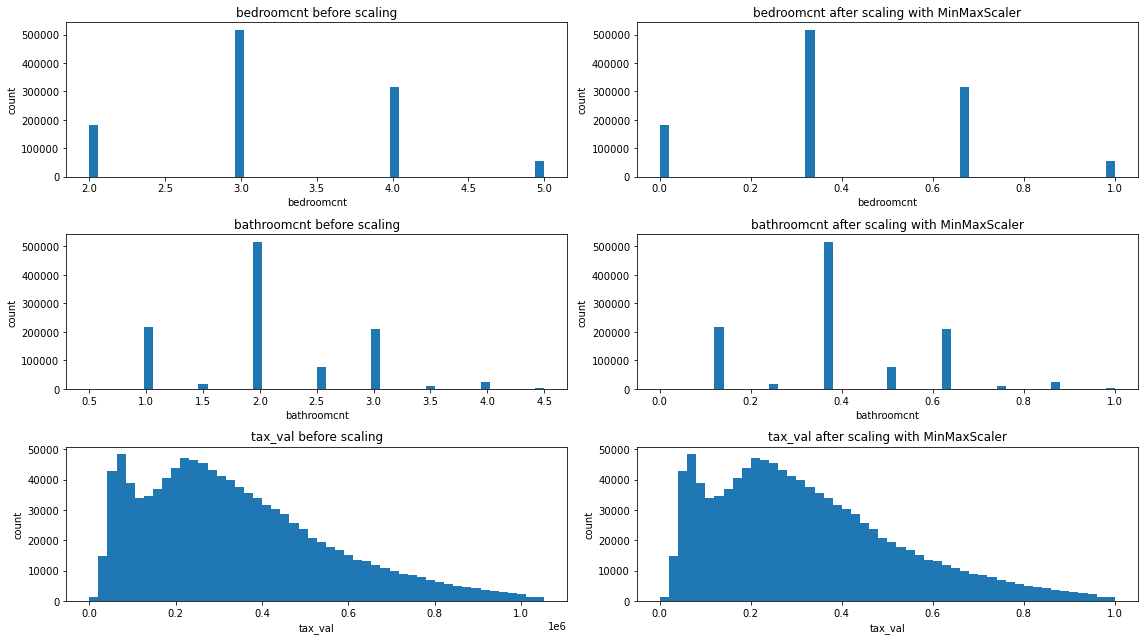

In [4]:
train_scaled = train.copy()

# make, fit, use:
columns_to_scale = ['bedroomcnt', 'bathroomcnt','tax_val']
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=columns_to_scale, 
                 bins=50)

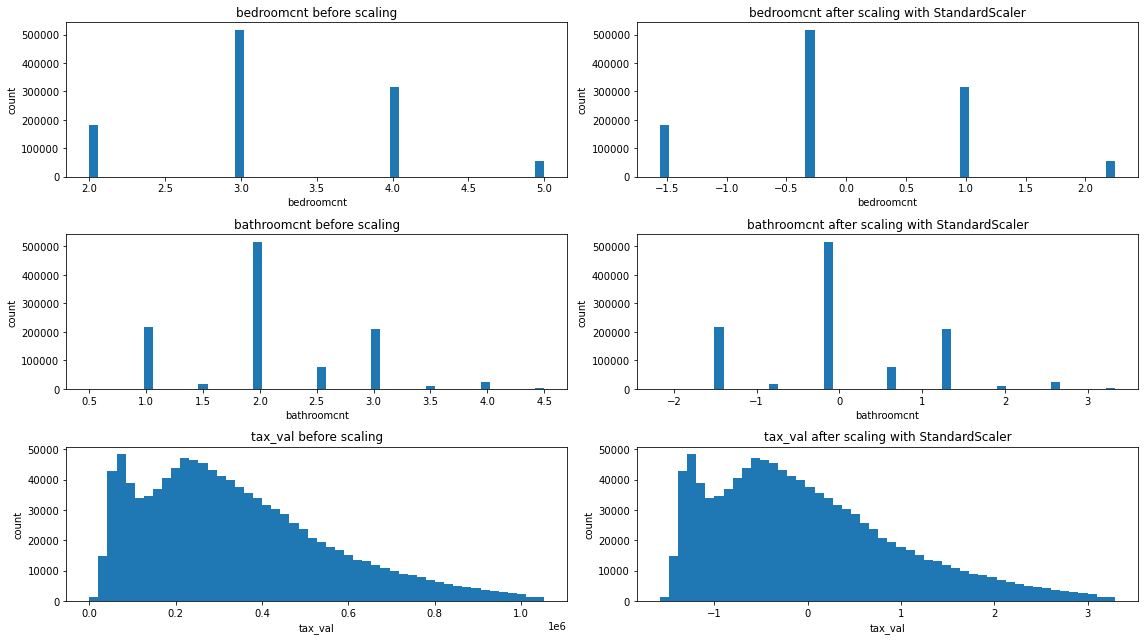

In [5]:
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

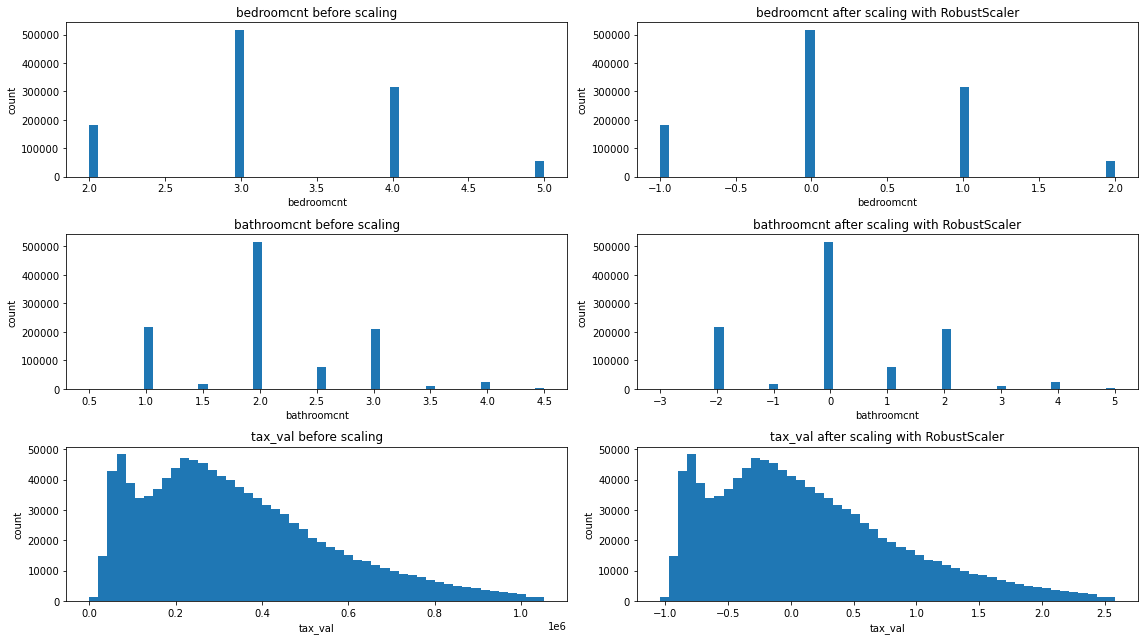

In [6]:
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

In [18]:
scaler = MinMaxScaler()
mask = ["tax_val"]
original_data = train[mask]

print(original_data.head(), "\n")

scaled_data = pd.DataFrame(scaler.fit_transform(original_data), columns = mask)

print(scaled_data.head())

          tax_val
405043   123381.0
279434   540847.0
764686   414210.0
1137271  156111.0
1104920  297753.0 

    tax_val
0  0.117059
1  0.513137
2  0.392988
3  0.148112
4  0.282497


In [16]:
scaler.inverse_transform(scaled_data)

print(scaled_data.head())

    tax_val
0  0.117059
1  0.513137
2  0.392988
3  0.148112
4  0.282497
